# Excercise - Multi-class classification of MNIST using Perceptron

In binary perceptron, where $\mathbf{y} \in \{-1, +1\}$, we used to update our weights only for wrongly classified examples.

The multi-class perceptron is regarded as a generalization of binary perceptron. Learning through iteration is the same as the perceptron. Weighted inputs are passed through a multiclass signum activation function. If the predicted output label is the same as true label then weights are not updated. However, when predicted output label $\neq$ true label, then the wrongly classified input example is added to the weights of the correct label and subtracted from the weights of the incorrect label. Effectively, this amounts to ’rewarding’ the correct weight vector, ’punishing’ the misleading, incorrect weight
vector, and leaving alone an other weight vectors.

In [1]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
import math
import gif
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the seed to ensure reproducibility of experiments
np.random.seed(11)

# One-hot encoding of target label, Y
def one_hot(a):
  b = -1 * np.ones((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

# Loading digits datasets
digits = datasets.load_digits()

# One-hot encoding of target label, Y
Y = digits.target
Y = one_hot(Y)

# Adding column of ones to absorb bias b of the hyperplane into X
X = digits.data
bias_ones = np.ones((len(X), 1))
X = np.hstack((X, bias_ones))

In [3]:
# Train-val-test data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, shuffle=True, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.12517)

print("Training dataset: ", X_train.shape)
print("Validation dataset: ", X_val.shape)
print("Test dataset: ", X_test.shape)

Training dataset:  (1257, 65)
Validation dataset:  (180, 65)
Test dataset:  (360, 65)


<Figure size 432x288 with 0 Axes>

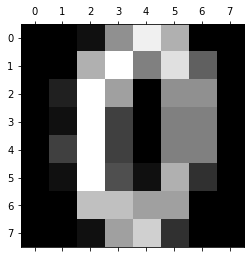

In [4]:
sns.reset_orig();

plt.gray()
plt.matshow(digits.images[10])
plt.show();

#### Write your code below

In [5]:
# Defining signum activation function
def signum(vec_w_x):
  """ signum activation for perceptron

  Parameters
  ------------
  vec_w_x: ndarray
    Weighted inputs
  """

  vec_w_x[vec_w_x >= 0] = 1
  vec_w_x[vec_w_x < 0] = -1
  return vec_w_x

In [6]:
# Perceptron training algorithm
def train(X_train, Y_train, weights, learning_rate=0.1, total_epochs=2500):

  """Training method for Perceptron.
  
  Parameters
  -----------

  X_train: ndarray (num_examples(rows) vs num_features(columns))
    Input dataset which perceptron will use to learn optimal weights
  
  Y_train: ndarray (num_examples(rows) vs class_labels(columns))
    Class labels for input data

  weights: ndarray (num_features vs n_output)
    Weights used to train the network and predict on test set

  learning_rate: int
    Learning rate use to learn and update weights
  
  total_epochs: int
    Max number of epochs to train the perceptron model
  """

  n_samples, _ = np.shape(X_train)
  history_weights = []
  epoch = 1
  calculate=np.zeros(X_train.shape[1])

  # Number of missclassified points we would like to see in the train set.
  # While training, its value will change every epoch. If m==0, our training 
  # error will be zero.
  m = 1

  # If the most recent weights gave 0 misclassifications, break the loop.
  # Else continue until total_epochs is completed.
  while m != 0 and epoch <= total_epochs:
    m = 0

    # Compute weighted inputs and predict class labels on training set.
    weights_transpose_x = np.dot(X_train, calculate)
    weights_transpose_x = signum(weights_transpose_x)
    y_train_out = np.multiply(Y_train, weights_transpose_x)
    epoch += 1
    
    # Collecting misclassified indexes and count them
    y_miscls_idxs = np.argwhere(y_train_out <= 0)[:, 0]
    y_miscls_idxs = np.unique(y_miscls_idxs)
    m = len(y_miscls_idxs)

    # Calculate gradients and update weights
    dweights = np.dot((X_train[y_miscls_idxs]).T, Y_train[y_miscls_idxs])
    calculate += (learning_rate/n_samples) * dweights
    calculate = np.round(calculate, decimals=4)

    # Append weights to visualize decision boundary later
    history_weights.append(calculate)

  if m == 0 and epoch <= total_epochs:
    print("Training has stabilized with all points classified: ", epoch)
  else:
    print(f'Training completed at {epoch-1} epochs. {m} misclassified points remain.')

  return calculate


In [7]:
# Evaluation for train, val, and test set.
def define_accuracy(y_predicted, Y_input_set, num_datapoints):
  miscls_points = np.argwhere(np.multiply(Y_input_set,signum(np.dot(y_predicted,calculate.T)))<= 0)[:, 0]
  ndatapoints=y_predicted.shape[0]
  accuracy = (1-len(miscls_points)/ndatapoints)*100
  return accuracy


In [8]:
learning_rate=0.1
trainsamples, d=X_train.shape 
calculate=np.zeros(shape=(10,d))
for i in range(0,10):
  calculate[i]= train(X_train,Y_train[:,i],calculate[i])
test=define_accuracy(X_test,Y_test,d)
print("Test :",test)
train=define_accuracy(X_train,Y_train,d)
print("Training :",train)
val=define_accuracy(X_train_val,Y_train_val,d)
print("Validation :",val)


Training has stabilized with all points classified:  211
Training completed at 2500 epochs. 14 misclassified points remain.
Training has stabilized with all points classified:  102
Training has stabilized with all points classified:  1410
Training has stabilized with all points classified:  226
Training has stabilized with all points classified:  435
Training has stabilized with all points classified:  331
Training has stabilized with all points classified:  310
Training completed at 2500 epochs. 39 misclassified points remain.
Training completed at 2500 epochs. 31 misclassified points remain.
Test : 84.16666666666667
Training : 92.68098647573588
Validation : 91.37091162143354
